# Final Project - Roy Roongseang

In [1]:
#Imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import pylab as pl
import numpy as np
import scipy as sc
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, metrics
from sklearn import cross_validation
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

/Users/royroongseang/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/royroongseang/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Experiment Write Up

### Project Problem & Hypothesis

The goal of the project is to be as accurate as possible in predicting sale prices for homes in Ames, Iowa based on a sample dataset provided by the Assessor's office. Potential models that could be used to predict a continuous variable such as sale prices are linear regression and Random Forest. The plan is to pick a handful of covariates for my linear regression model using the exploratory analysis. 

The impact of the analysis should help to identify homes in Ames, Iowa which are mispriced and aid in the decision on whether or not a potential home owner should buy or sell at a certain price given the features in the home. 

The covariates that I expect to be the most impactful when predicting final sale price are: Overall quality, Year built (with more recent builds fetching a higher price), and GrLivArea aka above ground living area. 

### Data Set

This dataset was pulled from Kaggle Home Prices: Advance Regression Techniques competition and originally gathered from the Ames, Iowa assessor's office for educational purposes. The training data has 79 covariates and a sample size of 1,460.

#### Link to full description of [data dictionary](data_description.txt)

In [2]:
#read dataset
df_raw = pd.read_csv("train.csv", engine = 'c')
df_test = pd.read_csv("test.csv", engine = 'c')

In [3]:
#data dimensions
df_raw.shape

(1460, 81)

In [4]:
#time range of data set
print(df_raw['YrSold'].min())
print(df_raw['YrSold'].max())

2006
2010


In [5]:
#list of all the covariates
df_raw.columns[:-1]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Domain Knowledge

My general knowledge of real estate is not any more than your average person but I think that it should give me enough common sense to make certain judgement calls on the data. As stated above, I expect to see overall quality, year built, and living area to have a significant impact on the sale price because who wouldn't want a nicer, newer and larger home. 

Other features may take some more research to develop an intuition, such as pool area. Ames, Iowa is about as north as Chicago so I expect there to be cold winters that do not make pools as relevant when determining sale price. A quick google search of Ames, Iowa public transportation returns a few bus stops and most are located around the university which may indicate that garage size could be important to a resident if they want to get around. Finally, like most cities, there are areas which tend to be nicer than others so researching neighborhoods may give a clue as to general home prices in the area.  

By using the features I plan to run a few models (stated above) against the test dataset and benchmark each one by calculating the RMSE (root mean squared error). The lower score the better.

### Project Concerns

##### 1) What questions do you have about your project? What are you not sure you quite yet understand? 

Should I use all or only some of the covariates when developing a model? I am not quite confident on the model selection process either, is it right that I use classification models like random forest to come up an continuous variable output?

##### 2) What are the assumptions and caveats to the problem?

Since there is not enough historical data to do a time series model, a caveat to the problem would be that the models generated in this analysis only applies to the years sold (2006-2010) and loses predictive strength outside this time period. The models generated in this analysis will only be applicable to Ames, Iowa since home preferences likely change from region to region.

##### 3) What data do you not have access to but wish you had?

I wish I had more historical and current data. The time frame of homes sold is only 4 years (2006-2010). 


##### 4) What's the cost of your model being wrong? (What's the benefit of your model being right?)

If someone were to use the model to purchase or sell a home in Ames, Iowa then the cost of being wrong could result in some monetary loss whether that be buying an overpriced home or selling an underpriced house. The opposite if the model is right.

##### 5) Is any of the data incorrect? Could it be incorrect?

Unable to verify the correctness of the data but there are several rows with missing data in certain columns. There is always a possiblity a portion of the data could be incorrect but assuming the assessors are well trained and have minimal input error then it should be sufficient to run an analysis on. 

### Outcome

##### 1) What do you expect the output to look like?

I expect the output to follow a relatively linear path but there may need to be some transformations to maintain the model assumptions of normality. I do not expect all features to be used in determining the output.

##### 2) What gain do you expect from your most important feature on its own?

I expect the most important feature on its own to explain most of the variability in sale price. In this case my guess is on home size.

##### 3) How complicated does your model have to be?

It can be as simple as a linear regression, but I expect that the more complicated model will outperform.

##### 4) How successful does your project have to be in order to be considered a "success"?

The median model RMSE score of all 6,699 team submissions is 0.13844 so my goal is to come up with a model that is equal to or slightly better than 0.13844.


# Exploratory Analysis

In this part of the analysis, I plan to explore the shape and correlation between Sale Price and covariates. I hope to find certain covariates that can be dropped without having much of an impact on the model's predictability. 

In [6]:
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#Exploring Sale Price measure of center and spread
pd.DataFrame(df_raw['SalePrice'].describe())

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [8]:
print(df_raw['SalePrice'].skew())
print(df_raw['SalePrice'].kurt())

1.88287575977
6.53628186006


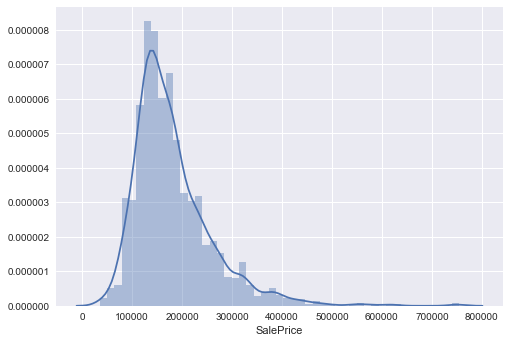

In [9]:
#plot histogram of sale price
sns.distplot(df_raw['SalePrice'])

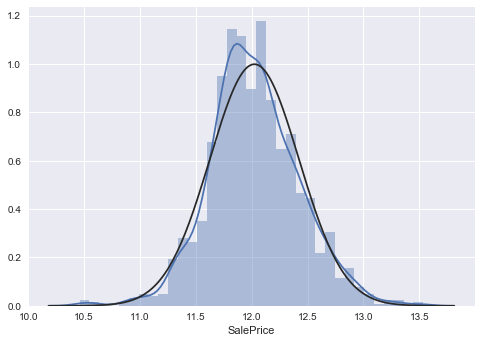

In [10]:
#from the histogram plot we see that Sale Price is positively skewed so to avoid heteroscedasticity in the linear model
#we can do a log transformation to normalize the data
from scipy.stats import norm

#setting transformed dependent variable with a new name
df_raw['SalePrice'] = np.log(df_raw['SalePrice'])

sns.distplot(df_raw['SalePrice'], fit=norm) 

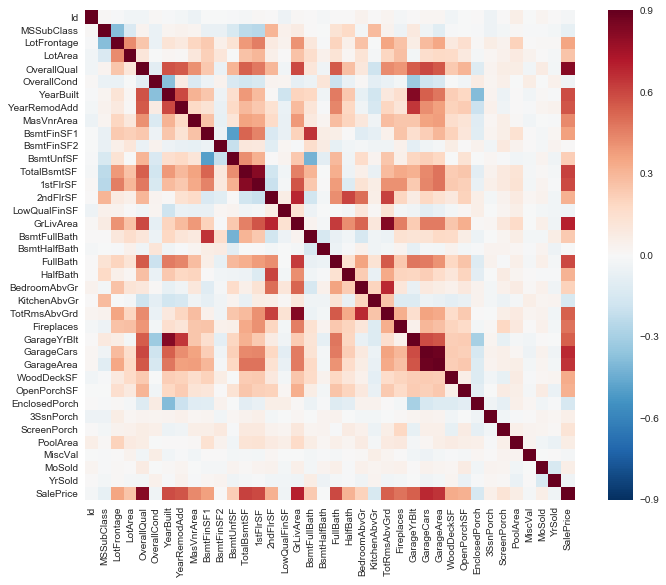

In [11]:
#Correlation map to see how the numerical features are correlated with SalePrice
corrmat = df_raw.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [12]:
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


The correlation matrix heat map quickly helps to identify variables which are highly correlated to sale price at a glance. From the map, we can reasonably choose variables such as OverallQual, YearBuilt, GrLivArea, FullBath, GarageCars, and TotalBsmtSF. 

On the flip side, we can also identify which variables are closely related to each other and drop them. For instance, GarageYrBlt and YearBuilt, as well as GarageCars and GarageArea are highly correlated so we can reasonable drop one of the variable from each pair to avoid collinearity. 

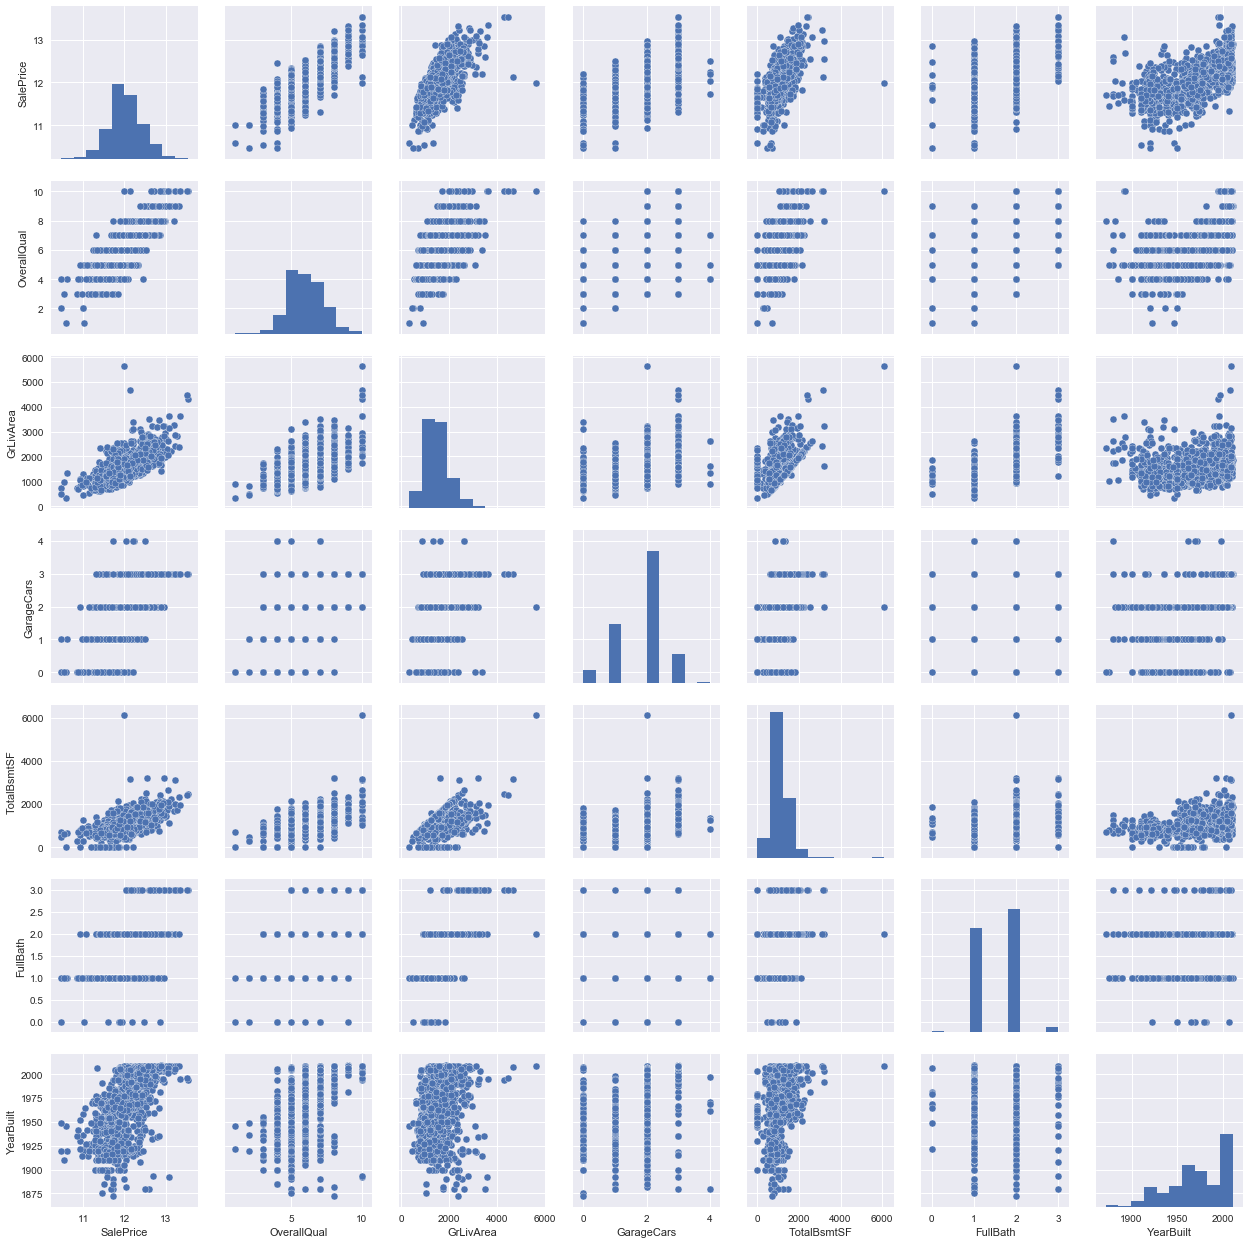

In [13]:
#Plots scatterplots and histograms for the most highly correlated variables to Sales Price
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_raw[cols], size = 2.5)
plt.show()

The scatterplots help to visualize the relationship between the variables and the dependent variable, particularly the first row of plots where Sales Prices trend up as each variable increases.

So far we've mainly explored the numerical covariates and ignored the categorical variables. There are 43 categorical variables and each one can have 2 to 20 different classification, multiplying by 1460 rows and dummifying each one can quickly create an overwhelming number of columns to parse through. In the essence of time, I will rely on my domain knowledge to select a feature to explore. 

Of the categorical features, Neighborhood jumps out as a variable that is likely to be a strong predictor of Sale Price.

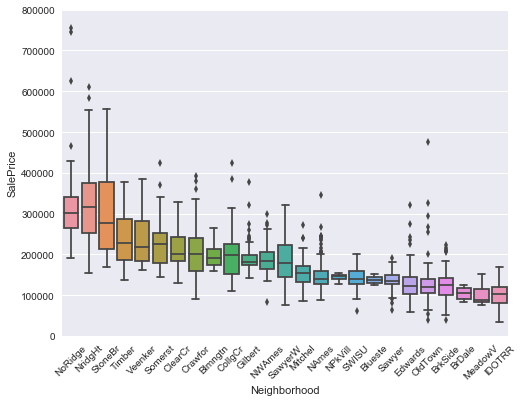

In [14]:
#box plot of Neighborhood, sorted by Sale Price
var = 'Neighborhood'
data = pd.concat([np.exp(df_raw['SalePrice']), df_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
ranks = df_raw.groupby(var)['SalePrice'].mean().fillna(0).sort_values()[::-1].index
fig = sns.boxplot(x=var, y="SalePrice", data=data, order=ranks)
plt.xticks(rotation=45)
fig.axis(ymin=0, ymax=800000);

As predicted there is some type of relationship between Neighborhood and sale price or else the boxplots would not trend upward at all and be relatively flat. This fits with the age old adage "location, location, location". Since there appears to be some kind of relationship I will include this in my linear regression model.

#### Outliers

Among the pairwise plots there seems to be a couple of outliers in the Greater living area covariate where we have some of the largest properties but the sale price is in the middle of the pack. This could be a land sale which would not be a representative part of our poplulation. 

In [15]:
#searched through the csv and found the ids of the outliers to delete
df_raw = df_raw.drop(df_raw[df_raw['Id'] == 1299].index)
df_raw = df_raw.drop(df_raw[df_raw['Id'] == 524].index)

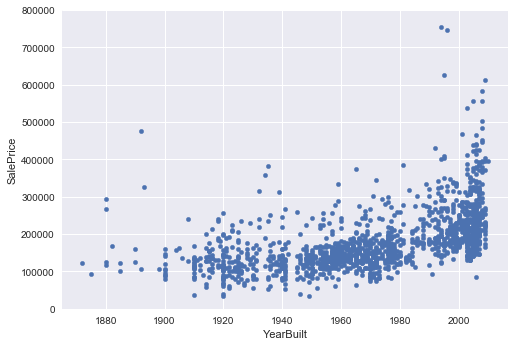

In [16]:
#scatterplot of GrLivArea against Sale price to check if outliers were removed and they were.
var = 'YearBuilt'
data = pd.concat([np.exp(df_raw['SalePrice']), df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### Missing Data

As with any dataset there are probably missing values and/or null values, especially when it comes to data inputted by people. Here I will explore where these exist and fill in the missing values if possible.

In [17]:
df_raw.shape

(1458, 81)

In [18]:
#Getting an idea for how many NaN values are in each column for the Train data set. 
for i,j in zip(df_raw.isnull().sum(), df_raw.isnull().sum().index):
    if i >0:
        print(j,i)

LotFrontage 259
Alley 1367
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1452
Fence 1177
MiscFeature 1404


Going to make a judgement call that any covariate with more than 200 missing values should be dropped because having greater than 15% of the sample data missing is too high to fill in with mean, median or zero values.

This means that I will be dropping LotFrontage, Alley, FireplaceQu, PoolQc, Fence, and MiscFeature. None of these features strike me as particularly important.

I am also going to drop GarageYrBlt because this feature is highly correlated with YearBuilt and Garage Area because it is correlated with GarageCar.

In [19]:
#dropping columns based on the above missing values and correlation matrix
df_raw.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'GarageYrBlt', 'GarageArea'], axis=1, inplace=True)

df_test.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'GarageYrBlt', 'GarageArea'], axis=1, inplace=True)


In [20]:
#Filling in missing values

#Blank MasVnrType will be categorized as none and MasVnrArea will be filled with the median value
df_raw['MasVnrType'] = df_raw["MasVnrType"].fillna("None")
df_raw['MasVnrArea'] = df_raw["MasVnrArea"].fillna(df_raw['MasVnrArea'].median())
df_test['MasVnrType'] = df_test["MasVnrType"].fillna("None")
df_test['MasVnrArea'] = df_test["MasVnrArea"].fillna(df_test['MasVnrArea'].median())

#Blank Bsmt features will be categorized as none
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_raw[col] = df_raw[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_test[col] = df_test[col].fillna('None')
    
#Blank Garage features will be categorized as none
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_raw[col] = df_raw[col].fillna('None')
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_test[col] = df_test[col].fillna('None')
    
#Blank Electrical feature will be replaced by the most common Electrical type
df_raw['Electrical'] = df_raw["Electrical"].fillna(df_raw['Electrical'].value_counts().index[0])

In [21]:
#checking to see if we have any more missing values
df_raw.isnull().sum().max()

0

### Exploratory Analysis Conclusion

Given the information discovered in the exploratory analysis I was able to extract certain covariates which I think are likely to impact Sale Price as well as exclude a few. With some data clean up we will be ready to perform the linear regression and other models. 

## Setting up the data to run the models

#### Linear Regression Set Up

In [22]:
#dummify Neighborhood
dummy_neighbor  = pd.get_dummies(df_raw['Neighborhood'])
dummy_neighbor.head()


,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
#Join dummify variables with self selected features to run in linear regression
cols_to_keep = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
trainSS = df_raw[cols_to_keep].join(dummy_neighbor.loc[:, 'Blueste':])
trainSS['intercept'] = 1.0

#matrix of self selected covariates to use for linear regression
trainSS_df = trainSS[trainSS.columns[1:]]
trainSS_df.head()


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Blueste,BrDale,BrkSide,ClearCr,...,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,intercept
0,7,1710,2,856,2,2003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,6,1262,2,1262,2,1976,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
2,7,1786,2,920,2,2001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,7,1717,3,756,1,1915,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,8,2198,3,1145,2,2000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


#### Random Forest Regression Set Up

In [24]:
#converting numerical features that is actually categorical so that it can be dummified

#MSSubClass=The building class
df_raw['MSSubClass'] = df_raw['MSSubClass'].apply(str)
df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
df_raw['OverallCond'] = df_raw['OverallCond'].astype(str)
df_test['OverallCond'] = df_test['OverallCond'].astype(str)

#month sold are transformed into categorical features.
df_raw['MoSold'] = df_raw['MoSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

In [25]:
#get dummies for all categorical values. Going to use this verision of dataframe for Random Forest
trainRF_df = pd.get_dummies(df_raw)
testRF_df = pd.get_dummies(df_test)
print(trainRF_df.shape)
print(testRF_df.shape)

(1458, 310)
(1459, 295)


# Modeling

### Linear regression with self selected covariates

In [26]:
#setting the X and y of the Linear Regression
y = trainSS['SalePrice']
X = trainSS_df

In [27]:
#instantiating the model
lin_mod = sm.OLS(y, X)

In [28]:
#training the model
result = lin_mod.fit()

In [29]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     324.7
Date:                Fri, 29 Sep 2017   Prob (F-statistic):               0.00
Time:                        14:53:52   Log-Likelihood:                 768.63
No. Observations:                1458   AIC:                            -1475.
Df Residuals:                    1427   BIC:                            -1311.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual     0.0871      0.005     17.958      

In [30]:
#importing models to perform k fold cross validation
kf = cross_validation.KFold(len(trainSS), n_folds=10, shuffle=True)

In [31]:
#setting Sale Price as Outcome
y = trainSS['SalePrice'] 

In [32]:
#Calculating the RMSE of the score by performing 10 k fold cross validation
rmse_values = []
scores = []
n= 0
print("#### CROSS VALIDATION each fold ####")
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(trainSS_df.iloc[train_index], y.iloc[train_index])
    mse = metrics.mean_squared_error(y.iloc[test_index], lm.predict(trainSS_df.iloc[test_index]))
    rmse_values.append(mse**.5)
    scores.append(lm.score(trainSS_df.iloc[test_index], y.iloc[test_index]))
    n+=1
#    Delete the # below to see 
#    print('Model', n)
#    print('RMSE:', rmse_values[n-1])
#    print('R2:', scores[n-1])


print("####  SUMMARY OF CROSS VALIDATION #####")
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))

#### CROSS VALIDATION each fold ####
####  SUMMARY OF CROSS VALIDATION #####
Mean of RMSE for all folds: 0.145473060712
Mean of R2 for all folds: 0.863693974144


Overall the model performed pretty well with a 0.87 R-squared value and 0.146 RMSE. There are a few variables in the linear regression that have high p-values (>0.05) but the model held up under K-fold cross validation so all in all I am satisfied with the results.

## Random Forest

In [33]:
#setting X and y variable for model, X dataframe includes almost all the features
y = trainRF_df['SalePrice']
X = trainRF_df.drop('SalePrice', axis=1)

In [34]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [35]:
x_train.shape

(1093, 309)

In [36]:
x_test.shape

(365, 309)

In [37]:
365/(1093+365)

0.2503429355281207

In [65]:
#instantiating the model
rf_model = RandomForestRegressor(min_samples_leaf=5)

In [66]:
#training the model
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [67]:
#training set performance on training data
rf_model.score(x_train,y_train)

0.93438735678901708

In [68]:
#training set performance on partitioned test data
rf_model.score(x_test, y_test)

0.88087016830702169

In [69]:
#Function to determine root mean square error by performing 5 fold cross validation
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_test, y_test, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [43]:
#RMSE of random forest. 
rmse_cv(rf_model).mean()

0.16437644081910446

The initial approach to running a random forest regression was to throw all the variables at it and see what it outputs. I was expecting to see a better R-squared and RMSE score but that might be because I mostly used the default parameters and let the model overfit. The next few lines of code look into what features random forest found important and what parameters should be tuned to optimize the output.

In [44]:
# Non parametric exploration of which features random forests finds useful
importances = pd.DataFrame(rf_model.feature_importances_, index=x_test.columns, columns=['score'])
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)

In [45]:
#Output of top 10 features random forest finds useful
importances.sort_values('score', ascending=False).head(10)

,score
OverallQual,0.574739
GrLivArea,0.123468
TotalBsmtSF,0.040219
CentralAir_N,0.030471
GarageCars,0.027860
1stFlrSF,0.024616
BsmtFinSF1,0.021169
CentralAir_Y,0.018966
BsmtQual_Ex,0.015812
YearRemodAdd,0.014145


It looks like Random Forest chose very similar features it found important as compared to the linear regression features I selected. Since random forest doesn't care about collinearity I can see why 1stFlrSF and BsmtFinSF1 ranks among the top features since it relates to overall living space. I find that YearRemodAdd and CentralAir_N makes sense in contributing to home value.

In [46]:
#Output lowest importance features. There are 207 useless features as determined by Random Forest
importances['score'].value_counts(ascending=False).head()

0.000000    206
0.002049      1
0.000266      1
0.000007      1
0.001439      1
Name: score, dtype: int64

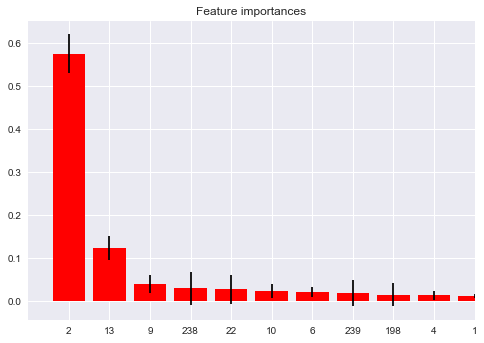

In [47]:
importances_plt = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances_plt)[::-1]


# Plot the top 10 feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances_plt[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, 10])
plt.show()

In [48]:
#maybe by running through different iterations of random forest regressor parameters 
#I can minimize the RMSE even further.
parameters = {'min_samples_leaf': [1,2,5,8,10],
             'max_depth': [5,10,10,15,20],
             'n_estimators': [5,10,25,40,50]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters, n_jobs=-1, verbose=0, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [1, 2, 5, 8, 10], 'max_depth': [5, 10, 10, 15, 20], 'n_estimators': [5, 10, 25, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [49]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [50]:
clf.best_estimator_.score(x_train, y_train)

0.98039949852329511

In [51]:
clf.best_estimator_.score(x_test, y_test)

0.89480436635381089

In [52]:
rmse_cv(clf.best_estimator_).mean()

0.1542489360046464

The optimize parameter Random Forest returned a better RMSE score than the default Random Forest model on the test data but still is significantly worse than the linear regression due to overfitting.

# Analysis Takeaways

The goal of this project was to get a model that could accurately predict sale price in Ames, Iowa. The benchmark used to measure a successful model was a RMSE because the kaggle leaderboard measures on this metric and it was interesting to try to get a score that was at least at the median, 0.13844.    

Using a linear regression model came really close to achieving the goal. This shows how robust the model is with proper feature selection.

Random Forest took a much shorter time to run because it didn't require all the feature selection and engineering to fit a model. A clear pitfall was overfitting the model under the default parameters. However, with GridSearchcv the parameters could be optimized to give it better predictive capabitlities. The downside is that it is computationally expensive especially for larger datasets. 




As mentioned in my initial write up, having more time related data such as quarter sold and more historical/current data could improve predictive capabilities since real estate is a highly cyclical marketplace. 

In [72]:
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = lin_mod
sub.to_csv('submission.csv',index=False)

In [60]:
ntrain = df_raw.shape[0]
ntest = df_test.shape[0]

print(ntrain)
print(ntest)

1458
1459


In [77]:
features = pd.concat([df_raw, df_test], keys=['train', 'test'])
features.tail(2)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType BsmtCond  \
test 1457       970         0          0             3     1Fam       TA   
     1458       996      1004          0             3     1Fam       TA   

          BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1   ...   SaleType  \
test 1457           Av       337.0         0.0          GLQ   ...         WD   
     1458           Av       758.0         0.0          LwQ   ...         WD   

           ScreenPorch  Street TotRmsAbvGrd  TotalBsmtSF Utilities WoodDeckSF  \
test 1457            0    Pave            6        912.0    AllPub         80   
     1458            0    Pave            9        996.0    AllPub        190   

          YearBuilt YearRemodAdd  YrSold  
test 1457      1992         1992    2006  
     1458      1993         1994    2006  

[2 rows x 73 columns]

In [78]:
pd.concat?